In [15]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

data = pd.read_csv("../data/model_data.csv")
this_season = data[data['season']==2023].copy()

model_data = data[data['season']<2023].copy()

features = [
    i for i in model_data.columns if i not in ['week','away_team','home_team','away_score','home_score','result','season',]
]
target = 'result'

Xtrain,Xtest,ytrain,ytest=train_test_split(model_data[features],model_data[target],test_size=.2,random_state=42,shuffle=True)

Iteration 1, loss = 103.55966799
Validation score: -0.023549
Iteration 2, loss = 103.28071621
Validation score: -0.051368
Iteration 3, loss = 102.87067589
Validation score: -0.004273
Iteration 4, loss = 102.84575829
Validation score: -0.001541
Iteration 5, loss = 102.33994808
Validation score: -0.012973
Iteration 6, loss = 102.49307854
Validation score: -0.003244
Iteration 7, loss = 102.59924503
Validation score: -0.014088
Iteration 8, loss = 101.89678125
Validation score: -0.037211
Iteration 9, loss = 102.55931559
Validation score: -0.009615
Iteration 10, loss = 102.22291544
Validation score: 0.001111
Iteration 11, loss = 102.31173921
Validation score: -0.002049
Iteration 12, loss = 102.23186820
Validation score: -0.008040
Iteration 13, loss = 102.29229560
Validation score: -0.000367
Iteration 14, loss = 102.14998571
Validation score: 0.002149
Iteration 15, loss = 102.03556772
Validation score: -0.010579
Iteration 16, loss = 101.91114054
Validation score: -0.003788
Iteration 17, loss 

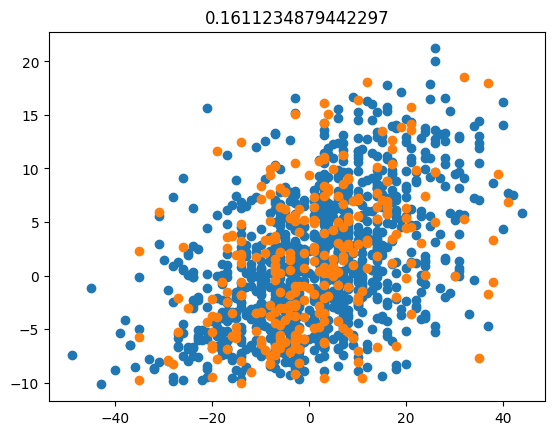

In [2]:
model = Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('learner',MLPRegressor(random_state=42,hidden_layer_sizes=(100,100),activation='logistic',
                            alpha=0,batch_size=1,solver='sgd',learning_rate_init=.0001,
                            tol=1e-8,
                            n_iter_no_change=50,
                      max_iter=4000,learning_rate='constant',shuffle=True,verbose=True,
                      early_stopping=True,
                      validation_fraction=.1))
]).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),Xtrain.index)
ypred = pd.Series(model.predict(Xtest),Xtest.index)

plt.scatter(ytrain,yfit)
plt.scatter(ytest,ypred)
plt.title(str(r2_score(ytest,ypred)))
plt.show()

In [16]:
this_seasonX = this_season[features].copy()
this_season_prediction = pd.Series(model.predict(this_seasonX.fillna(0)),this_seasonX.index)
this_season['PRED'] = this_season_prediction
this_season[this_season['week']==1][['away_team','home_team','spread_line','PRED']]

,away_team,home_team,spread_line,PRED
0,DET,KC,4.0,3.229885
1,CAR,ATL,3.5,3.254224
2,HOU,BAL,9.5,9.564414
3,CIN,CLE,-2.5,-4.422786
4,JAX,IND,-5.0,-5.547360
5,TB,MIN,5.5,2.349531
6,TEN,NO,3.0,3.518272
7,SF,PIT,-2.0,-5.389551
8,ARI,WAS,7.0,5.002849
9,GB,CHI,1.0,-0.669557


In [18]:
from joblib import dump
dump(model,"model.joblib")

['model.joblib']

In [19]:

this_season[this_season['week']==2][['away_team','home_team','spread_line','PRED']]

,away_team,home_team,spread_line,PRED
16,MIN,PHI,7.0,6.805351
17,GB,ATL,1.5,-2.344707
18,LV,BUF,9.0,7.779815
19,BAL,CIN,3.5,2.693525
20,SEA,DET,2.5,0.298810
21,IND,HOU,1.5,0.755928
22,KC,JAX,-3.0,-4.818108
23,CHI,TB,-1.5,-1.479378
24,LAC,TEN,-3.0,-5.297010
25,NYG,ARI,-5.0,-4.785298
